## CBIS-DDSM Dataset Exploration

This notebook summarizes primary insights into the dataset, to be used as a foundation for the deep learning project.

In [51]:
#import necessary DS libraries
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import os
import kagglehub
%matplotlib inline
from IPython.display import display


In [2]:
path = kagglehub.dataset_download("awsaf49/cbis-ddsm-breast-cancer-image-dataset")
print(path)

100%|██████████| 4.95G/4.95G [07:39<00:00, 11.6MB/s]

Extracting model files...


/Users/rohansujeesh/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1


In [2]:
#data directory
filepath = "/Users/rohansujeesh/Desktop/DeepLearning/DL/cbis-ddsm/"

In [3]:
#initialize dataframes for each csv
def get_df(path):
    df_dict = {}
    for file in os.listdir(path+"csv"):
        df_dict[file[:-4]]=pd.read_csv(path+"csv/"+file)
    return df_dict

In [4]:
csv_dict = get_df(filepath)

In [5]:
#print csv filenames
csv_dict.keys()

dict_keys(['mass_case_description_train_set', 'calc_case_description_test_set', 'calc_case_description_train_set', 'meta', 'dicom_info', 'mass_case_description_test_set'])

In [6]:
csv_dict["mass_test"]=csv_dict.pop("mass_case_description_test_set")
csv_dict["mass_train"]=csv_dict.pop("mass_case_description_train_set")
csv_dict["calc_test"]=csv_dict.pop("calc_case_description_test_set")
csv_dict["calc_train"]=csv_dict.pop("calc_case_description_train_set")

In [7]:
#check number of data entries per csv
for key,value in csv_dict.items():
    print(f"{key}: {len(value)} entries")


meta: 6775 entries
dicom_info: 10237 entries
mass_test: 378 entries
mass_train: 1318 entries
calc_test: 326 entries
calc_train: 1546 entries


 dicom_info appears to have all the datasets combined

In [40]:
#exploring the combined dataframe
cd_df = csv_dict["dicom_info"]

In [41]:
cd_df.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [42]:
cd_df["image_path"] = cd_df["image_path"].str.replace("CBIS-DDSM/",filepath,regex=False)

In [43]:
cd_df.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,/Users/rohansujeesh/Desktop/DeepLearning/DL/cb...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,/Users/rohansujeesh/Desktop/DeepLearning/DL/cb...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,/Users/rohansujeesh/Desktop/DeepLearning/DL/cb...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,/Users/rohansujeesh/Desktop/DeepLearning/DL/cb...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,/Users/rohansujeesh/Desktop/DeepLearning/DL/cb...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [44]:
#types of images in dataset
cd_df.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [45]:
cd_df=cd_df.dropna(subset=["SeriesDescription"])

In [46]:
#create container for each type of image
types_dict={}
for types in cd_df.SeriesDescription.unique():
     types_dict[types]= cd_df[cd_df.SeriesDescription==types]

types_dict.keys()

dict_keys(['cropped images', 'full mammogram images', 'ROI mask images'])

In [47]:
sample_paths = [df["image_path"].iloc[0] for df in types_dict.values()]    

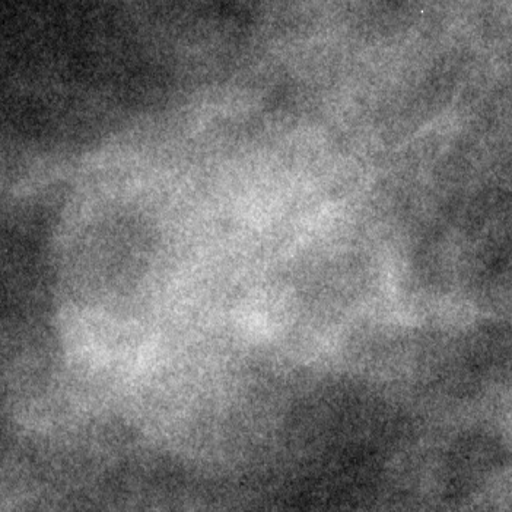

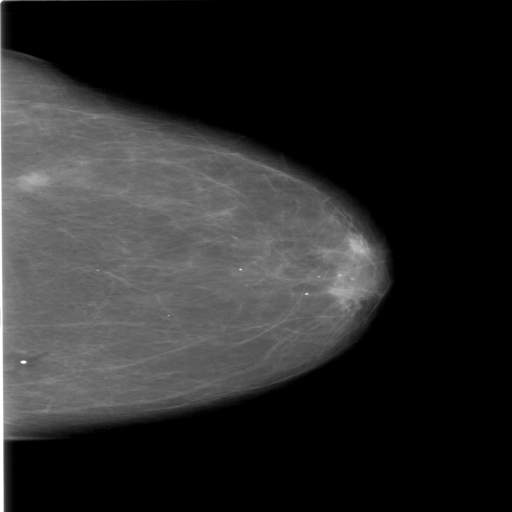

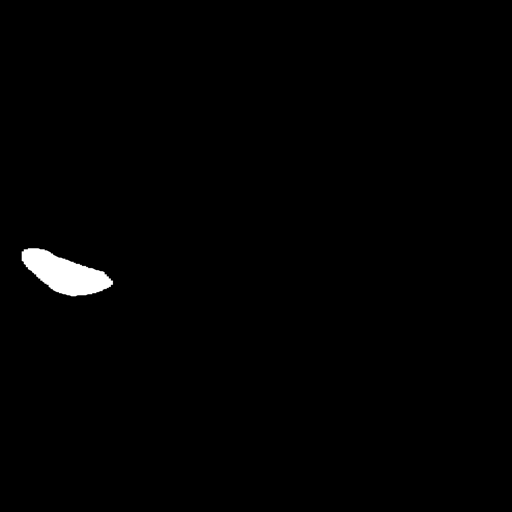

In [ ]:
#show sample images for each image type
new_size = (512,512)
for paths in sample_paths:
    im = Image.open(paths)
    im=im.resize(size=new_size)
    display(im)

In [81]:
#examine training data
calc_df = csv_dict["calc_train"]
mass_df = csv_dict["mass_train"]

In [82]:
calc_df.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [92]:
def get_count(df):
    count={}
    for i in df.pathology.unique():
        count[i]=calc_df["pathology"].value_counts().get(i,0)
    return count

In [94]:
counts_calc = get_count(calc_df)
counts_mass = get_count(mass_df)

In [84]:
def plot_dist(dictionary, set):
    sns.set(rc={"axes.edgecolor":"#666666","axes.labelsize":12.0,"axes.labelweight":"bold"})
    ax = sns.barplot(x=dictionary.keys(),y=dictionary.values(), color="white", edgecolor="black")

    for c in ax.containers:
        ax.bar_label(c,label_type="edge", fontsize=12)

    plt.ylabel("Datapoints")
    plt.xlabel("Pathology")
    plt.title(f"Data Distribution for {set} Training Set")
    sns.despine()
    return ax

<Axes: title={'center': 'Data Distribution for calcification Training Set'}, xlabel='Pathology', ylabel='Datapoints'>

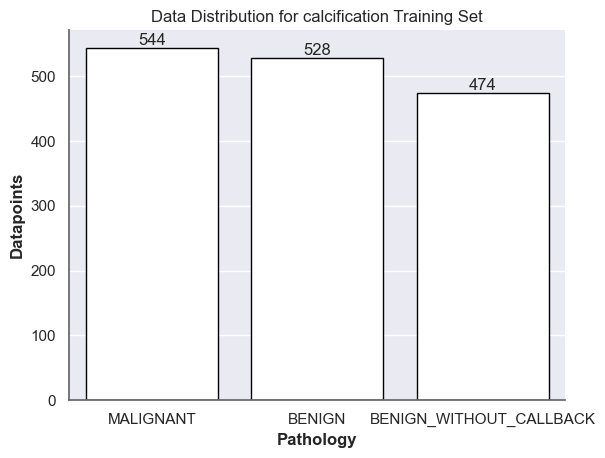

In [90]:
plot_dist(counts_calc,"calcification")

<Axes: title={'center': 'Data Distribution for mass Training Set'}, xlabel='Pathology', ylabel='Datapoints'>

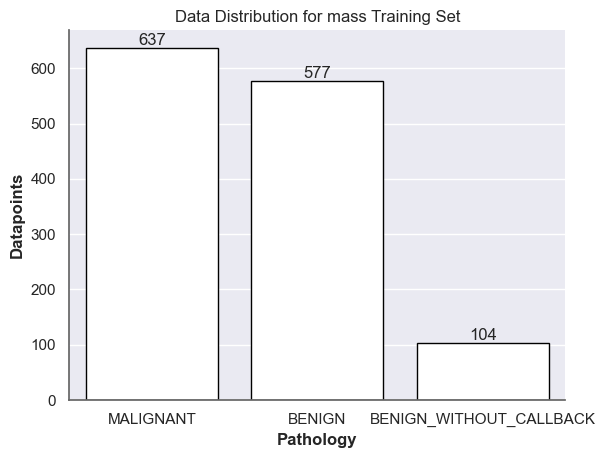

In [91]:
plot_dist(counts_mass,"mass")